# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Endah Rakhmawati
- **Email:** endahen12@gmail.com
- **ID Dicoding:** endah_ndahen

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Faktor apa yang jadi penentu customer dalam memberikan rating maupun review?
- Pertanyaan 2 : Bagaimana customer behaviour pada metode pembayaran yang dilakukan?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [9]:
# Membuka file csv sebagai dataset analisis bisnis
orders = pd.read_csv("orders_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
payments = pd.read_csv("order_payments_dataset.csv")
products = pd.read_csv("products_dataset.csv")
categories = pd.read_csv("product_category_name_translation.csv")
reviews = pd.read_csv("order_reviews_dataset.csv")

In [10]:
dfs = {
    "orders": orders,
    "order_items": order_items,
    "payments": payments,
    "products": products,
    "categories": categories,
    "reviews": reviews
}

In [11]:
# Menampilkan detail masing-masing dataset yang dikumpulkan
for name, df in dfs.items():
    print(f"\n{name.upper()} - dimension:", df.shape) # dimensi dataset
    print(f"Column Names:\n{df.columns.tolist()}\n") # nama-nama kolom
    print(f"Data Types:\n{df.dtypes}") # tipe data tiap kolom
    print(f"\n{name.upper()} - top 5:") # 5 sample baris
    print(df.head(),'\n')


ORDERS - dimension: (99441, 8)
Column Names:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Data Types:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

ORDERS - top 5:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f815

**Insight:**
- Sesuai pertanyaan bisnis maka kita butuhkan 6 dataset antara lain : orders, order_items, payments, products, categories, dan reviews

### Assessing Data

Missing Values

In [15]:
# Mengecek jumlah null value pada tiap dataset
for name, df in dfs.items():
    print(f"\n{name.upper()} - NULL values:")
    print(df.isnull().sum(),'\n')


ORDERS - NULL values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 


ORDER_ITEMS - NULL values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 


PAYMENTS - NULL values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 


PRODUCTS - NULL values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product

Duplicate Data

In [17]:
# Mengecek jumlah baris yang duplikat tiap dataset
for name, df in dfs.items():
    print(f"\n{name.upper()} - Duplicates: {df.duplicated().sum()}")


ORDERS - Duplicates: 0

ORDER_ITEMS - Duplicates: 0

PAYMENTS - Duplicates: 0

PRODUCTS - Duplicates: 0

CATEGORIES - Duplicates: 0

REVIEWS - Duplicates: 0


**Insight:**
- Missing value ditemukan pada beberapa kolom dataset, kita pahami dulu penyebab yang relevan adanya null value
- Tidak ada data yang duplikat pada semua dataset

### Cleaning Data

Mengubah Tipe Data

In [21]:
# Mengubah tipe data object menjadi datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])

Dropping Columns

In [23]:
# Menghapus kolom yang kurang relevan dengan pertanyaan bisnis
products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], \
              axis=1, inplace=True)

In [24]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [25]:
# Menghapus review_comment_title karena fungsinya dapat digantikan dengan review_comment_message
reviews.drop('review_comment_title', axis=1, inplace=True)

In [26]:
reviews.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


Menambah kolom baru

In [28]:
# Membuat kolom baru product_category_name_english yang berisi value product_category_name_english dari categories tiap product_id
products['product_category_name_english'] = products['product_category_name']\
.map(categories.set_index('product_category_name')['product_category_name_english'])

In [29]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0,housewares


In [30]:
# Membuat kolom baru product_category_english yang berisi value product_category_name_english dari products tiap product_id
order_items['product_category_english'] = order_items['product_id']\
.map(products.set_index('product_id')['product_category_name_english'])

In [31]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [32]:
# Membuat kolom baru purchase_year_month yang merupakan ekstrak tahun dan bulan dari order_purchase_timestamp
orders['purchase_year_month'] = orders['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [33]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


Imputation

In [35]:
# Mengisi null value beberapa kolom products yang numerik dengan nilai median dan kategori dengan label 'unknown'
products['product_category_name'] = products['product_category_name'].fillna('unknown')
products['product_category_name_english'] = products['product_category_name_english'].fillna('unknown')
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].median())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].median())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].median())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].median())

In [36]:
products.isnull().sum()

product_id                       0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [37]:
# Mengisi null value beberapa kolom orders yang bertipe datetime disamakan dengan 'order_purchase_timestamp'
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'])
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'])

In [38]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
purchase_year_month              0
dtype: int64

In [39]:
# Mengisi null value product_category_english pada order_items dengan label 'unknown'
order_items['product_category_english'] = order_items['product_category_english'].fillna('unknown')

In [40]:
order_items.isnull().sum()

order_id                    0
order_item_id               0
product_id                  0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
product_category_english    0
dtype: int64

### Merging Data

In [42]:
# Merge value berdasarkan order_id dari beberapa dataframe dimapping ke dataframe orders
orders = orders.merge(order_items[['order_id', 'seller_id', 'product_id', 'product_category_english', 'price']], how='left', on='order_id')
orders = orders.merge(payments[['order_id', 'payment_type', 'payment_value', 'payment_installments']], how='left', on='order_id')
orders = orders.merge(reviews[['order_id', 'review_score', 'review_comment_message']], how='left', on='order_id')

In [43]:
# Mengecek null value dari data order_items berdasarkan order_status
cek_items = orders[orders['seller_id'].isnull() | orders['product_id'].isnull() | orders['product_category_english'].isnull() | orders['price'].isnull()][['order_id','order_status']]
cek_items.drop_duplicates(keep='first', inplace=True)
cek_items['order_status'].value_counts()

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

In [44]:
# Mengecek kejanggalan order_id pada status selain 'unavailable' and 'canceled'
status = ['created','invoiced','shipped']
list_order = orders[(orders['seller_id'].isnull() | orders['product_id'].isnull()) & orders['order_status'].isin(status)]['order_id'].values

In [45]:
# order_id yang hanya memiliki payment_value, tidak ada pesanan produk
payments[payments['order_id'].isin(list_order)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
26362,35de4050331c6c644cddc86f4f2d0d64,1,credit_card,7,105.87
41909,b5359909123fa03c50bdb0cfed07f098,1,credit_card,10,160.94
49542,7a4df5d8cff4090e541401a20a22bb80,1,boleto,1,37.84
68282,90ab3e7d52544ec7bc3363c82689965f,1,credit_card,6,245.85
75617,2ce9683175cdab7d1c95bcbb3e36f478,1,boleto,1,73.04
88900,a68ce1686d536ca72bd2dadc4b8671e5,1,boleto,1,77.73
95187,dba5062fbda3af4fb6c33b1e040ca38f,1,boleto,1,137.60
99415,e04f1da1f48bf2bbffcf57b9824f76e1,1,credit_card,7,76.19


In [46]:
# Mengecek list order_id tersebut pada dataframe order_items
order_items[order_items['order_id'].isin(list_order)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_english


In [47]:
# Mengecek null value dari data payments
orders[orders['payment_type'].isnull() | orders['payment_value'].isnull() | orders['payment_installments'].isnull()]['order_id'].nunique()

1

In [48]:
payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [49]:
# Imputasi null value pada payment_type dengan label 'unknown' dan payment_installments dengan nilai median
orders['payment_type'] = orders['payment_type'].fillna('not_defined')
orders['payment_installments'] = orders['payment_installments'].fillna(orders['payment_installments'].median()).astype('int64')

In [50]:
orders[['payment_type','payment_installments']].isnull().sum()

payment_type            0
payment_installments    0
dtype: int64

In [51]:
# Mengetahui 1 order_id dapat memiliki lebih dari 1 review_id
cek_revid = reviews.groupby(by='order_id', as_index=True).agg(nunique_revid=('review_id', pd.Series.nunique))
cek_revid = cek_revid[cek_revid['nunique_revid']>2] # jumlah review_id diatas 2
cek_revid

,nunique_revid
order_id,
03c939fd7fd3b38f8485a0f95798f1f6,3
8e17072ec97ce29f0e1f111e598b0c85,3
c88b1d1b157a9999ce368f218a407141,3
df56136b8031ecd28e200bb18e6ddb2e,3


In [52]:
# Mengetahui 1 order_id memiliki review_score dan review_comment_message berbeda-beda
orders[orders['order_id']=='03c939fd7fd3b38f8485a0f95798f1f6']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year_month,seller_id,product_id,product_category_english,price,payment_type,payment_value,payment_installments,review_score,review_comment_message
14726,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-02-25 21:01:08,2018-02-26 09:35:46,2018-02-26 22:46:40,2018-03-19 21:48:52,2018-04-02,2018-02,d91fb3b7d041e83b64a00a3edfb37e4f,ab5da1daa941470d14366f4e76a99dd2,home_appliances,26.0,voucher,42.11,1,3.0,Um ponto negativo que achei foi a cobrança de ...
14727,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-02-25 21:01:08,2018-02-26 09:35:46,2018-02-26 22:46:40,2018-03-19 21:48:52,2018-04-02,2018-02,d91fb3b7d041e83b64a00a3edfb37e4f,ab5da1daa941470d14366f4e76a99dd2,home_appliances,26.0,voucher,42.11,1,4.0,NaN
14728,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-02-25 21:01:08,2018-02-26 09:35:46,2018-02-26 22:46:40,2018-03-19 21:48:52,2018-04-02,2018-02,d91fb3b7d041e83b64a00a3edfb37e4f,ab5da1daa941470d14366f4e76a99dd2,home_appliances,26.0,voucher,42.11,1,3.0,Seria ótimo se tivesem entregue os 3 (três) pe...


In [53]:
# Mengecek null value review_score berdasarkan product_id
cek_rvw = orders[orders['review_score'].isnull()][['order_id','product_id']]
cek_rvw.drop_duplicates(keep='first', inplace=True)
cek_rvw['product_id'].value_counts().nlargest(5)

product_id
99a4788cb24856965c36a24e339b6058    9
7c1bd920dbdf22470b68bde975dd3ccf    4
84f456958365164420cfc80fbe4c7fab    4
42a2c92a0979a949ca4ea89ec5c7b934    4
a92930c327948861c015c919a0bcb4a8    4
Name: count, dtype: int64

In [54]:
orders[orders['review_score'].isnull()]['product_id'].nunique()

725

In [55]:
# Mengecek null value review_comment_message berdasarkan product_id
cek_rvw = orders[orders['review_comment_message'].isnull()][['order_id','product_id']]
cek_rvw.drop_duplicates(keep='first', inplace=True)
cek_rvw['product_id'].value_counts().nlargest(5)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    282
99a4788cb24856965c36a24e339b6058    245
53b36df67ebb7c41585e8d54d6772e08    202
422879e10f46682990de24d770e7f83d    195
d1c427060a0f73f6b889a5c7c61f2ac4    186
Name: count, dtype: int64

In [56]:
orders[orders['review_comment_message'].isnull()]['product_id'].nunique()

23444

**Insight:**
- Melakukan assesing dan cleaning data agar data lebih akurat dan tepat guna untuk mendapatkan solusi/insight bisnis yang diminta
- Merging data order_items, payments, reviews ke dalam dataframe orders, agar proses filtering data lebih cepat
- Null value pada skor rating maupun komentar review dibiarkan apa adanya, tidak bisa dipaksakan memiliki value tertentu

## Exploratory Data Analysis (EDA)

### Eksplorasi rating pada pengiriman dan kategori produk 

In [60]:
orders[['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date']].isnull().sum()

order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [61]:
# Menghitung lama waktu/hari produk diterima customer setelah melakukan pembayaran
orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Menghitung keterlambatan waktu/hari antara tanggal produk diterima customer dan estimasi tanggal penerimaan produk
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

In [62]:
# Menghitung banyak value delivery days, urut dari yang terbanyak yaitu 7 hari
orders['delivery_days'].value_counts().sort_values(ascending=False).head()

delivery_days
7    9180
6    8161
8    8149
9    7273
5    7023
Name: count, dtype: int64

In [63]:
# Menghitung nilai tengah delivery days pada tiap review_score
orders.groupby('review_score')['delivery_days'].median()

review_score
1.0    16.0
2.0    13.0
3.0    12.0
4.0    10.0
5.0     9.0
Name: delivery_days, dtype: float64

In [64]:
# Membuat pivot dataframe dengan menormalkan setiap baris. Ini berarti bahwa untuk setiap baris, jumlah nilainya akan sama dengan 1.
review_dist = pd.crosstab(
    orders['product_category_english'],
    orders['review_score'],
    normalize='index')

# Menambah 2 kolom baru yaitu ulasan buruk dan ulasan baik, berisi hasil penjumlahan sesuai review_score yang ditentukan pada tiap kategori produk
review_dist['bad_share'] = review_dist[[1.0, 2.0, 3.0]].sum(axis=1)
review_dist['good_share'] = review_dist[[4.0, 5.0]].sum(axis=1)

In [65]:
# Menghitung banyak nilai masing-masing product_category_english
category_counts = orders['product_category_english'].value_counts()

# Ambil index yaitu nama product_category_english saja yang memiliki jumlah pesanan diatas 100
valid_categories = category_counts[category_counts > 100].index

# Ambil nilai review_dist pada product_category_english yang telah diambil barusan
filtered_reviews = review_dist.loc[valid_categories]

In [66]:
# Mengambil 10 product_category_english teratas dengan ulasan buruk
top_bad = filtered_reviews.sort_values(by='bad_share', ascending=False).head(10)

# Mengambil 10 product_category_english teratas dengan ulasan baik
top_good = filtered_reviews.sort_values(by='good_share', ascending=False).head(10)

In [67]:
# Menampilkan 10 product_category_english teratas dengan ulasan buruk
top_bad

review_score,1.0,2.0,3.0,4.0,5.0,bad_share,good_share
product_category_english,,,,,,,
office_furniture,0.203046,0.050761,0.142132,0.224478,0.379583,0.395939,0.604061
fashion_male_clothing,0.277778,0.034722,0.048611,0.138889,0.500000,0.361111,0.638889
fixed_telephony,0.197026,0.063197,0.070632,0.208178,0.460967,0.330855,0.669145
audio,0.164456,0.050398,0.098143,0.153846,0.533156,0.312997,0.687003
home_confort,0.151261,0.033613,0.126050,0.134454,0.554622,0.310924,0.689076
bed_bath_table,0.145522,0.047438,0.098422,0.188149,0.520469,0.291382,0.708618
furniture_living_room,0.132184,0.047893,0.109195,0.195402,0.515326,0.289272,0.710728
construction_tools_safety,0.176768,0.025253,0.085859,0.196970,0.515152,0.287879,0.712121
unknown,0.179070,0.037791,0.070930,0.194767,0.517442,0.287791,0.712209


In [68]:
# Menampilkan 10 product_category_english teratas dengan ulasan baik
top_good

review_score,1.0,2.0,3.0,4.0,5.0,bad_share,good_share
product_category_english,,,,,,,
costruction_tools_tools,0.089109,0.000000,0.009901,0.207921,0.693069,0.099010,0.900990
books_general_interest,0.073084,0.014260,0.037433,0.151515,0.723708,0.124777,0.875223
books_technical,0.081784,0.026022,0.037175,0.144981,0.710037,0.144981,0.855019
luggage_accessories,0.080242,0.021570,0.065574,0.187230,0.645384,0.167386,0.832614
food,0.101761,0.025440,0.050881,0.185910,0.636008,0.178082,0.821918
food_drink,0.062069,0.017241,0.100000,0.175862,0.644828,0.179310,0.820690
computers,0.115207,0.009217,0.055300,0.216590,0.603687,0.179724,0.820276
home_appliances_2,0.078358,0.033582,0.074627,0.223881,0.589552,0.186567,0.813433
agro_industry_and_commerce,0.107143,0.027778,0.055556,0.226190,0.583333,0.190476,0.809524


**Insight:**

- Delivery days terbanyak adalah 7 hari. Semakin besar delivery days maka semakin kecil skor rating yang diberikan.
- Dalam hal ketidakpuasan pelanggan (skor rating 1,2,3) meliputi perabot kantor, pakaian pria, dan telepon rumah. Sementara itu, pelanggan secara konsisten menilai perkakas, buku, dan koper dengan baik (skor rating 4 dan 5). Hasil ini memberikan dasar yang kuat untuk analisis lebih lanjut, terutama terkait kondisi item, faktor pengiriman dan pembayaran yang mungkin mendorong perbedaan kepuasan ini.

### Eksplorasi Tipe Pembayaran

In [71]:
orders['payment_type'].isnull().sum()

0

In [72]:
# Melihat macam-macam tipe pembayaran
orders['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', 'not_defined'],
      dtype=object)

In [73]:
# Distribusi tipe pembayaran dalam %
payment_type_share = orders['payment_type'].value_counts(normalize=True).nlargest(4)
payment_type_share = (payment_type_share*100).round(2)
payment_type_share

payment_type
credit_card    73.67
boleto         19.46
voucher         5.43
debit_card      1.43
Name: proportion, dtype: float64

In [74]:
# Menghitung rata-rata payment_value tiap payment_type
mean_payment = orders.groupby('payment_type')['payment_value'].mean().round().nlargest(4)
mean_payment

payment_type
credit_card    180.0
boleto         177.0
debit_card     151.0
voucher         67.0
Name: payment_value, dtype: float64

In [75]:
# Menghitung persentase installment orders
installment_ratio = (orders['payment_installments'] > 1).mean() * 100
print(f'The proportion of installment orders: {installment_ratio:.2f}%')

The proportion of installment orders: 50.10%


In [76]:
# Menghitung persentase rata-rata installment value tiap kategori produk
installment_by_category = orders.groupby('product_category_english')['payment_installments'].apply(lambda x: (x > 1).mean()).nlargest(10)
installment_top_categories = (installment_by_category*100).round()
installment_top_categories

product_category_english
computers                                75.0
la_cuisine                               69.0
furniture_mattress_and_upholstery        66.0
small_appliances_home_oven_and_coffee    65.0
watches_gifts                            65.0
diapers_and_hygiene                      62.0
bed_bath_table                           60.0
fashio_female_clothing                   60.0
fashion_shoes                            59.0
home_confort                             59.0
Name: payment_installments, dtype: float64

**Insight:**
- Credit card mendominasi, mencakup 73,67% dari semua pembayaran. Metode terpopuler kedua, boleto, tertinggal jauh di belakang dengan 19,46%, diikuti oleh voucher (5,43%) dan kartu debit (1,43%).
- Pembayaran cicilan merupakan hal yang lumrah. Lebih dari setengah dari semua transaksi kartu kredit (50,10%) dibayar dengan cicilan, yang secara efektif mengaburkan batasan antara keterjangkauan dan pengeluaran yang tertunda.
- Pembayaran cicilan ini khususnya terlihat pada kategori barang mahal atau yang memiliki aspirasi tinggi seperti PC (tingkat cicilan 75%)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa yang jadi penentu customer dalam memberikan rating maupun review?

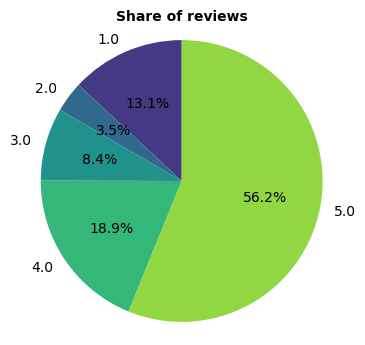

In [80]:
# Distribusi review_score dalam %
score_counts = orders['review_score'].value_counts().sort_index()

plt.figure(figsize=(4, 4), dpi=100)

#colors = ['deepskyblue', 'mediumaquamarine', 'plum', 'sandybrown', 'indianred'] 
colors = sns.color_palette('viridis', n_colors=len(score_counts))

plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})

plt.title('Share of reviews', fontsize=10, fontweight='bold', pad=5)
plt.axis('equal');

**Insight:**
- Sebagian besar customer memberi penilaian pesanannya dengan skor rating 5 dengan persentase 56,2%


In [82]:
# Menghitung total review_id setiap nilai review_score
total_rev = reviews.groupby('review_score')['review_id'].count()

# Menghitung banyaknya review_comment_message yang tidak terisi pada tiap review_score
miss_rev = reviews[reviews['review_comment_message'].isnull()].groupby('review_score')['review_id'].count()

# Menghitung persentase review_comment_message yang terisi
res = 100 - (miss_rev / total_rev).fillna(0)*100

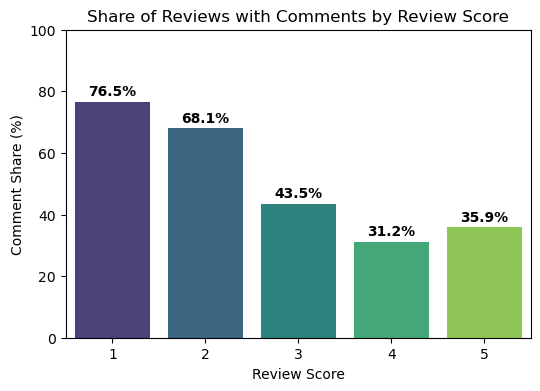

In [83]:
# Distribusi review_score yang terisi review_comment_message
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = sns.barplot(x=res.index, y=res.values, palette='viridis')

for i, v in enumerate(res.values):
    ax.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.title("Share of Reviews with Comments by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Comment Share (%)")
plt.ylim(0, 100);

**Insight:**
- Pelanggan yang tidak puas (skor 1 dan 2) cenderung memberikan review terperinci dengan komentar masing-masing sebesar 76.5% dan 68.1% dari jumlah review, sedangkan pelanggan yang puas biasanya hanya memberikan peringkat

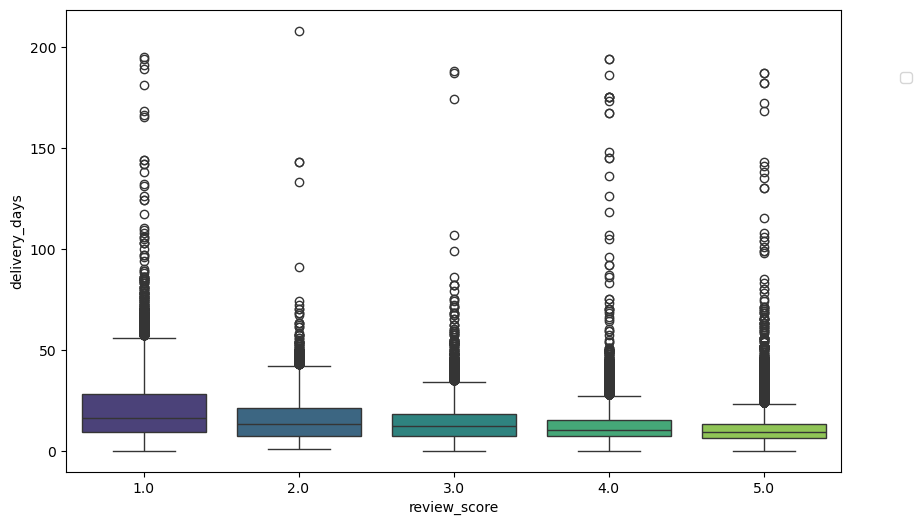

In [85]:
# Distribusi review_score form terhadap delivery days
plt.figure(figsize=(10,6))
sns.boxplot(x=orders['review_score'], y=orders['delivery_days'], palette='viridis')
plt.legend(bbox_to_anchor=(1.1, 0.88));

**Insight:**
- Waktu pengiriman memiliki dampak yang jelas pada kepuasan pelanggan. Pesanan dengan skor ulasan yang lebih rendah cenderung memiliki waktu pengiriman yang jauh lebih lama, pengiriman yang lebih cepat sangat berkorelasi dengan peringkat pelanggan yang lebih tinggi

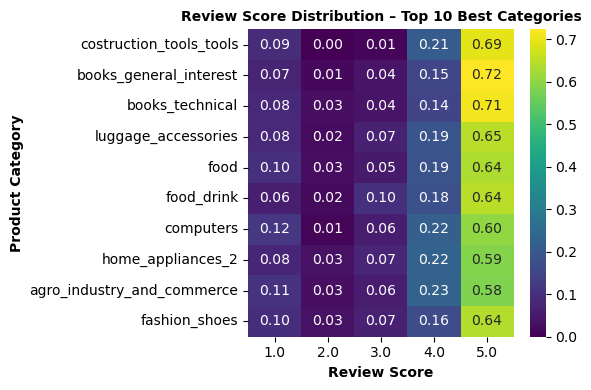

In [87]:
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(top_good[[1.0, 2.0, 3.0, 4.0, 5.0]], annot=True, cmap='viridis', fmt='.2f')
plt.title('Review Score Distribution – Top 10 Best Categories', fontsize=10, fontweight='bold')
plt.ylabel('Product Category', fontsize=10, fontweight='bold')
plt.xlabel('Review Score', fontsize=10, fontweight='bold')
plt.tight_layout();

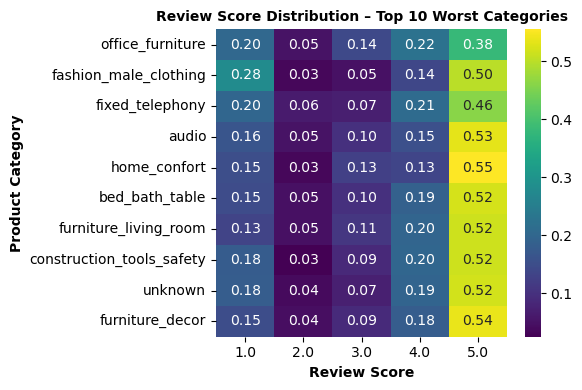

In [88]:
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(top_bad[[1.0, 2.0, 3.0, 4.0, 5.0]], annot=True, cmap='viridis', fmt='.2f')
plt.title('Review Score Distribution – Top 10 Worst Categories', fontsize=10, fontweight='bold')
plt.ylabel('Product Category', fontsize=10, fontweight='bold')
plt.xlabel('Review Score', fontsize=10, fontweight='bold')
plt.tight_layout();

**Insight:**
- Kategori produk dalam hal ketidakpuasan pelanggan — meliputi office furniture, fashion male clothing, dan fixed telephony. Sementara itu, pelanggan secara konsisten menilai construction tools, books general interest, dan books technical dengan skor rating baik. Hasil ini memberikan dasar yang kuat untuk analisis lebih lanjut yang mendorong perbedaan kepuasan ini.

### Pertanyaan 2: Bagaimana customer behaviour pada metode pembayaran yang dilakukan?

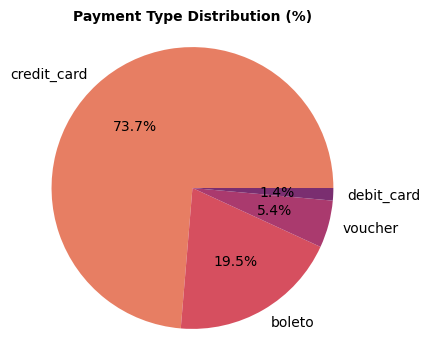

In [91]:
# Distribusi tipe pembayaran dalam %
plt.figure(figsize=(4, 4), dpi=100)

#colors = ['deepskyblue', 'mediumaquamarine', 'plum', 'sandybrown', 'indianred'] 
colors = sns.color_palette('flare', n_colors=len(payment_type_share.index))

plt.pie(payment_type_share.values, labels=payment_type_share.index, autopct='%1.1f%%',
        startangle=0, colors=colors, textprops={'fontsize': 10})

plt.title('Payment Type Distribution (%)', fontsize=10, fontweight='bold', pad=10)
plt.axis('equal');

**Insight:**
- Credit card mendominasi, mencakup 73,67% dari semua pembayaran. Metode terpopuler kedua, boleto, tertinggal jauh di belakang dengan 19,46%, diikuti oleh voucher (5,43%) dan kartu debit (1,43%). Preferensi ini tidak hanya berbicara tentang akses tetapi juga fleksibilitas yang diharapkan konsumen

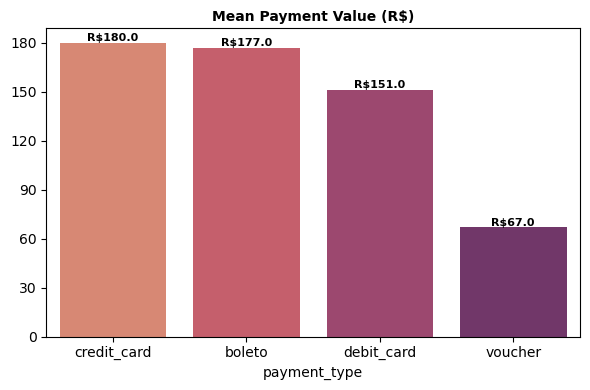

In [93]:
# Visualisasi rata-rata payment_value pada tiap tipe pembayaran
plt.figure(figsize=(6,4), dpi=100)

sns.barplot(x=mean_payment.index, y=mean_payment.values, palette='flare')

plt.title('Mean Payment Value (R$)', fontsize=10, fontweight='bold', pad=5)
for i, v in enumerate(mean_payment.values):
    plt.text(i, v + 1, f'R${v}', ha='center', fontsize=8, fontweight='bold')
plt.yticks(range(0, int(mean_payment.max()) + 10, 30))
plt.xticks(rotation=0, ha='center')
plt.tight_layout();

**Insight:**
- Nilai pembayaran rata-rata memperkuat kesenjangan ini. Pengguna kartu kredit dan boleto membelanjakan uang dengan jumlah yang sama (masing-masing R180 dan R177), sementara pengguna kartu debit membelanjakan lebih sedikit (R151). Voucher menunjukkan nilai rata-rata terendah, hanya R67 — yang menunjukkan penggunaannya yang terbatas di segmen premium.

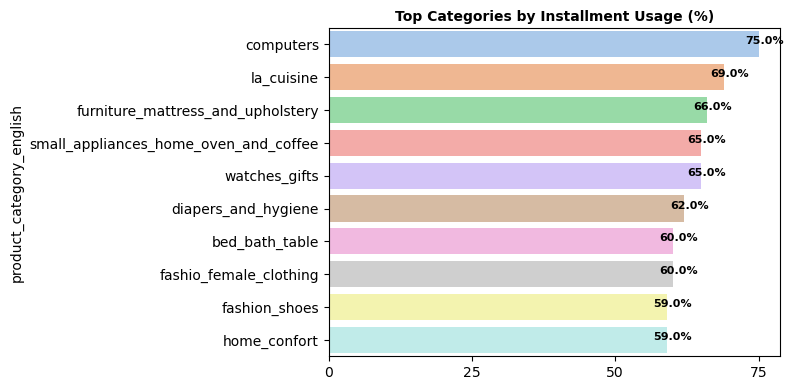

In [95]:
# Top 10 kategori produk berdasarkan % rata-rata installment value
plt.figure(figsize=(8,4), dpi=100)

sns.barplot(x=installment_top_categories.values, y=installment_top_categories.index, palette='pastel', orient='h')

plt.title('Top Categories by Installment Usage (%)', fontsize=10, fontweight='bold', pad=5)
for i, v in enumerate(installment_top_categories.values):
    plt.text(v + 1, i , f'{v}%', ha='center', fontsize=8, fontweight='bold')
plt.xticks(range(0, int(installment_top_categories.max()) + 10, 25))
plt.yticks(rotation=0)
plt.tight_layout();

**Insight:**
- Pembayaran cicilan ini khususnya terlihat pada kategori barang mahal atau yang memiliki aspirasi tinggi seperti PC (tingkat cicilan 75%), peralatan dapur, kasur, dan peralatan rumah tangga. Bahkan pada kategori mode dan hadiah, penggunaan cicilan sering kali melebihi 60%.

## Conclusion

- Conclusion pertanyaan 1 : Faktor apa yang jadi penentu customer dalam memberikan rating maupun review?

    Waktu pengiriman memiliki dampak yang jelas pada kepuasan pelanggan. Pesanan dengan skor ulasan yang lebih rendah cenderung memiliki waktu pengiriman yang jauh lebih lama. Durasi pengiriman rata-rata turun secara konsisten dari 16 hari (skor 1) menjadi 9 hari (skor 5), yang menunjukkan bahwa pengiriman yang lebih cepat sangat berkorelasi dengan peringkat pelanggan yang lebih tinggi.

    Analisis kami terhadap komentar ulasan yang hilang menunjukkan bahwa ulasan negatif (1-2 bintang) lebih cenderung berisi umpan balik tertulis, sementara peringkat yang lebih tinggi (4-5 bintang) sering kali tidak memiliki komentar teks. Hal ini menunjukkan bahwa pelanggan yang tidak puas cenderung memberikan umpan balik terperinci, sedangkan pelanggan yang puas biasanya hanya memberikan peringkat. Kondisi ini menyoroti area yang perlu ditingkatkan, khususnya dalam keandalan pengiriman dan kepuasan pelanggan

    Kami menganalisis bagaimana skor ulasan produk bervariasi di berbagai kategori, dengan fokus pada bagian umpan balik negatif (skor ≤ 3). Untuk memastikan relevansi statistik, hanya kategori dengan lebih dari 100 pesanan yang disertakan. Kami memvisualisasikan distribusi peringkat untuk 10 kategori dengan kinerja terbaik dan terburuk. Area yang paling bermasalah — dalam hal ketidakpuasan pelanggan — meliputi perabot kantor, pakaian pria, dan telepon rumah. Sementara itu, pelanggan secara konsisten menilai perkakas, buku, dan koper dengan baik. Hasil ini memberikan dasar yang kuat untuk analisis lebih lanjut, terutama terkait faktor pengiriman dan pembayaran yang mungkin mendorong perbedaan kepuasan ini.
  
- Conclusion pertanyaan 2 : Bagaimana customer behaviour pada metode pembayaran yang dilakukan?

    Singkatnya, struktur pembayaran sangat bergantung pada kredit, dengan ketergantungan kuat pada rencana cicilan untuk barang-barang kebutuhan pokok dan gaya hidup. Pedagang dan platform yang mengakomodasi — atau memberi insentif — perilaku ini berada pada posisi yang lebih baik untuk mendorong konversi dan ukuran keranjang belanja. Sebaliknya, segala batasan pada penggunaan kredit atau opsi cicilan dapat menjadi titik gesekan utama dalam proses pembelian.
    

In [99]:
# Export the DataFrame to a CSV file
orders.to_csv('merged_orders.csv', index=False)